In [3]:
import pandas as pd
import numpy as np

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [4]:
documentName = 'chatriotgames101821'
folderName = '/ChatLogs/chatriotgames/'

In [5]:
data = pd.read_csv('..'+ folderName + documentName + 'Clean' + '.csv')
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,0,slap LUL i
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap


In [6]:
analyser = SentimentIntensityAnalyzer()



In [7]:


new_emotes = {
    'omegalul': 2,
    'lilw': 0,
    'monkaw': -3.0,
    'waytoodank': 0,
    'ez': 2.0,
    'clap' : 3.0,
    'lul' : 2.0,
    'booba' : 1.0,
    'pepega' : -3.0,
    'feelsgoodman' : 3.0,
    'wutfac' : -3.0,
    'sadge' : -4.0,
    'kreygasm' : 3.0,
    'kappa' : 0,
    'peeposad' : -4.0,
    'pogu' : 4.0,
    'truening' : 0,
    'lulw' : 2.0,
    'feelsbadman' : -3.0,
    'pogchamp' : 3.0,
    'poggers' : 3.0,
    'heyguys' : 2.0,
    'pepehands': -2.0,
    'rip' : -2.0,
    'seemsgood' : 3.0,
    'notlikethis' : -2.0,
    'clap' : 2.0,
    'pog' : 2.0,
    'smorc' : 0,
    'dansgam' : -4.0,
    'ez' : -1.0,
    'peeposad' : -2.0,    
}

In [8]:
analyser.lexicon.update(new_emotes)

In [9]:
data['scores'] = data['Cleanest_message'].apply(lambda clean_message:analyser.polarity_scores(clean_message))

In [10]:
data.head(5)

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'comp..."
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [11]:
total=analyser.polarity_scores(data['Cleanest_message'])

In [12]:
total

{'neg': 0.138, 'neu': 0.706, 'pos': 0.155, 'compound': 0.9905}

In [13]:
pd.set_option('display.max_colwidth', 200)

In [14]:
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}"
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}"
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}"


In [15]:


data['comp_score'] = data['scores'].apply(lambda score_dict: score_dict['compound'])

In [16]:
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores,comp_score
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}",0.6523
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}",0.5859
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}",0.4588


In [17]:
#data['sentiment']=''
#data.loc[data.comp_score>0,'sentiment']='POSITIVE'
#data.loc[data.comp_score==0,'sentiment']='NEUTRAL'
#data.loc[data.comp_score<0,'sentiment']='NEGATIVE'

In [18]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

In [19]:
data['sentiment'] = data['comp_score'].apply(categorise_sentiment)

In [20]:
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores,comp_score,sentiment
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}",0.6523,positive
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}",0.5859,positive
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}",0.4588,positive


<AxesSubplot:title={'center':'sentiment analysis'}>

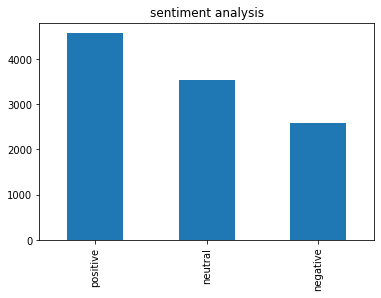

In [21]:
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

In [22]:
data.to_csv ('..'+ folderName + documentName + 'Sentiment Analysis' + '.csv', index = False, header=True)

<AxesSubplot:ylabel='Frequency'>

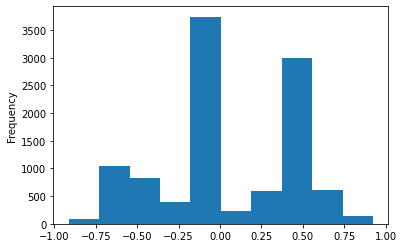

In [23]:
%matplotlib inline


data['comp_score'].plot(kind='hist')

In [24]:
X=data['Cleanest_message']
y=data['sentiment']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
y.tail()

10675    positive
10676    negative
10677    negative
10678    negative
10679    positive
Name: sentiment, dtype: object

In [26]:
X.head()

0    slap LUL i
1            go
2           wif
3           win
4          Clap
Name: Cleanest_message, dtype: object

In [27]:
X_train.shape

(7155,)

In [28]:
y_test.shape

(3525,)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(7155, 317)

In [30]:
#print(X_train_tfidf)

In [31]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [32]:
from sklearn.pipeline import Pipeline


text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [33]:
#Only training set has been vectorized into a full vocabulary.
#In order to perform an analysis on test set scikit-learn offers a Pipeline that behaves like a compound classifier

In [34]:
predictions = text_clf.predict(X_test)

In [35]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 832   24   14]
 [   4 1143    9]
 [   5   32 1462]]


In [36]:
print(metrics.accuracy_score(y_test,predictions))

0.9750354609929078


In [37]:
myreview = "Booba Booba"

In [38]:
print(text_clf.predict([myreview]))

['positive']


https://www.koreascience.or.kr/article/JAKO202024758671657.pdf #why choose TFIDF vs WORD2VEC

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
wordcloud = WordCloud().generate(' '.join(data['Cleanest_message']))

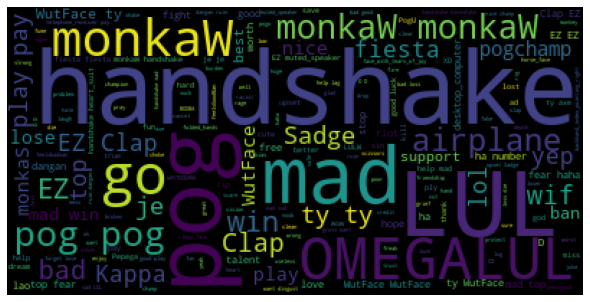

In [43]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()